In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Jake\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


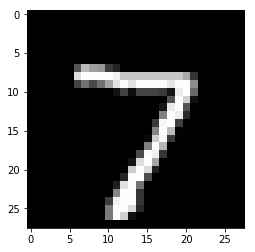

In [10]:
# Step 1: Create a TFRecordDataset and iterator
dset = tf.data.TFRecordDataset('images/mnist_test.tfrecords')
iter = dset.make_one_shot_iterator()

# Step 2: Create a dictionary that describes the examples
feature_dict = {'images': tf.FixedLenFeature([], tf.string),
               'labels': tf.FixedLenFeature([], tf.int64)}

# Step 3: Parse the first example
with tf.Session() as sess:
    example = sess.run(iter.get_next())
    mnist = tf.parse_single_example(example, feature_dict)
    
# Step 4: Convert the data in the first image to a 28-by-28 array
    pixels = tf.decode_raw(mnist['images'], tf.uint8)
    pixel_matrix = pixels.eval().reshape((28,28))
    
# Step 5: Display the image
    plt.imshow(pixel_matrix, cmap='gray')
    plt.show()